In [1]:
# Load in the message
with open("msg.txt", 'r') as f:
    message = [line for line in f.readlines()]

In [2]:
from collections import defaultdict

In [3]:
message

['m"kvq!b ,hx!n ubtvnvra.r,",a,"hkvq" ul!v"rvnvil,uh\n',
 'vhgvlkq!b ,"kxv"kveu"quvak",rvhgv on"k,ly,vn!lv!l onql\n',
 've",uv,ulvq" ul!,ly,tv"kvnv\n',
 'lg"kl\n',
 'vinkkl!tve",uv,ulvulo vhgvnvdlbfv,ulvwak",rwvinbv.lvr"kxolvol,,l!rvs,ulvihr,vqhiihk(tv n"!rvhgvol,,l!rtv,!" ol,rvhgvol,,l!rtvi"y,a!lrvhgv,ulvn.hcltvnk\n',
 'vrhvgh!,u)v,ulv!lql"cl!v\n',
 'lq" ul!rv,ulv,ly,v.bv l!gh!i"kxv,ulv"kcl!rlvra.r,",a,"hkv !hqlrrv,hvly,!nq,v,ulvh!"x"knovilrrnxl)mmra.r,",a,"hkvq" ul!rvqnkv.lvqhi n!l\n',
 've",uv,!nkr hr","hkvq" ul!r)v"kvnv,!nkr hr","hkvq" ul!tv,ulvak",rvhgv,ulv on"k,ly,vn!lv!ln!!nkxl\n',
 'v"kvnv\n',
 '"ggl!lk,vnk\n',
 'varanoobvpa",lvqhi olyvh!\n',
 'l!tv.a,v,ulvak",rv,ulirloclrvn!lvolg,vakqunkxl\n',
 ')v.bvqhk,!nr,tv"kvnvra.r,",a,"hkvq" ul!tv,ulvak",rvhgv,ulv on"k,ly,vn!lv!l,n"kl\n',
 'v"kv,ulvrnilvrlpalkqlv"kv,ulvq" ul!,ly,tv.a,v,ulvak",rv,ulirloclrvn!lvno,l!l\n',
 ')mm,ul!lvn!lvnvkai.l!vhgv\n',
 '"ggl!lk,v,b lrvhgvra.r,",a,"hkvq" ul!)v"gv,ulvq" ul!vh l!n,lrvhkvr"kxolvol,,l!rtv",v"

The message is pretty jumbled, the amount of new line characters and the shortness of some lines lead me to believe that the new line character is part of the pattern.
My first instinct is this is a basic shift cipher.
So lets see if it is.

In [4]:
# Find the pool of all used characters in the message
pool = set()
for m in message:
    for c in m:
        pool.add(c)

In [5]:
pool

{'\n',
 ' ',
 '!',
 '"',
 '(',
 ')',
 ',',
 '.',
 ';',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y'}

We can see some punctuation characters, white space, and the alphabet from a-y. This leads me to believe it is a substitution cipher with the non-alphabet characters included. lets compare it to a known body of text.

In [6]:
# Create a dictionary with the count of each letter as the value (in the message)
chars = defaultdict(int)
for m in message:
    for c in m:
        chars[c] += 1

In [7]:
# We will compare with Jane Austen's emma from the gutenberg corpus
import nltk
nltk.download('gutenberg');
emma = nltk.corpus.gutenberg.words('austen-emma.txt')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\iwimme\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [8]:
alpha = 'abcdefghijklmnopqrstuvwxyz'
# Create the same dictionary with the frequency as the values
emma_chars = defaultdict(int)
for em in emma:
    for e in em.lower():
        if e in pool:  # Only use characters that appear in the message
            emma_chars[e] += 1
    if len(em) > 1:  # estimates the number of spaces as the text automatically strips
        if em[-1] in alpha:  # estimates if the end of the word is a letter.
            emma_chars[' '] += 1    

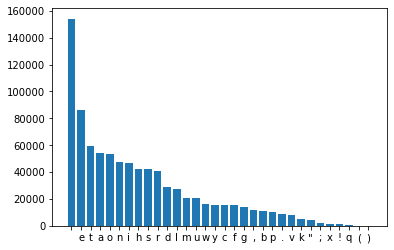

In [9]:
import matplotlib.pyplot as plt

# Create a sorted dictionary based on the keys
sort_orders = sorted(emma_chars.items(), key=lambda x: x[1], reverse=True)
emma_ranks = [i[0] for i in sort_orders]
emma_ranks.append("\n")  # append newline as low frequency due to corpus not including

# Plot the bar graph of the distribution of characters
plt.bar(range(len(sort_orders)), [x[-1] for x in sort_orders], align='center')
plt.xticks(range(len(sort_orders)), [x[0] for x in sort_orders]);

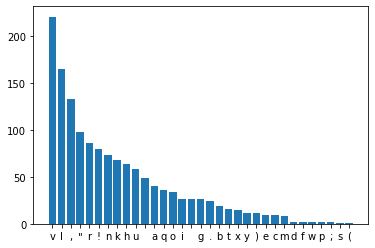

In [10]:
# Create a sorted dictionary based on the keys
chars_orders = sorted(chars.items(), key=lambda x: x[1], reverse=True)
chars_ranks = [i[0] for i in chars_orders]
# Plot the bar graph of the distribution of characters
plt.bar(range(len(chars_orders)), [x[-1] for x in chars_orders], align='center')
plt.xticks(range(len(chars_orders)), [x[0] for x in chars_orders]);

We can see that the distributions are relatively close and we can estimate one as the other

In [11]:
# Create the cipher
cipher = {}
for i in range(len(chars_ranks)):
    cipher[chars_ranks[i]] = emma_ranks[i]

cipher

{'v': ' ',
 'l': 'e',
 ',': 't',
 '"': 'a',
 'r': 'o',
 '!': 'n',
 'n': 'i',
 'k': 'h',
 'h': 's',
 'u': 'r',
 ' ': 'd',
 'a': 'l',
 'q': 'm',
 'o': 'u',
 'i': 'w',
 '\n': 'y',
 'g': 'c',
 '.': 'f',
 'b': 'g',
 't': ',',
 'x': 'b',
 'y': 'p',
 ')': '.',
 'e': 'v',
 'c': 'k',
 'm': '"',
 'd': ';',
 'f': 'x',
 'w': '!',
 'p': 'q',
 ';': '(',
 's': ')',
 '(': '\n'}

We can see our original cipher and can see what the decoded message looks like

In [12]:
for mes in message:
    for letter in mes:
        print(cipher[letter], end='')

"ah mngdtsbnidrg, i olfotatltash madren ao i wetrsy sc ehmngdtahb ah vramr lhato sc duiahtept ine neduimey vatr tre madrentept, ah i yecahey wihhen, vatr tre reud sc i ;egx tre !lhato! wig fe oahbue uetteno )tre wsot mswwsh
, diano sc uetteno, tnadueto sc uetteno, waptlneo sc tre ifske, ihy os csntr. tre nemeaken yemadreno tre tept fg dencsnwahb tre ahkenoe olfotatltash dnsmeoo ts eptnimt tre snabahiu weooibe.""olfotatltash madreno mih fe mswdiney vatr tnihodsoatash madreno. ah i tnihodsoatash madren, tre lhato sc tre duiahtept ine neinnihbey ah i yacceneht ihy loliuug qlate mswduep snyen, flt tre lhato trewoeukeo ine uect lhmrihbey. fg mshtniot, ah i olfotatltash madren, tre lhato sc tre duiahtept ine netiahey ah tre oiwe oeqlehme ah tre madrentept, flt tre lhato trewoeukeo ine iuteney.""trene ine i hlwfen sc yacceneht tgdeo sc olfotatltash madren. ac tre madren sdeniteo sh oahbue uetteno, at ao tenwey i oawdue olfotatltash madrenx i madren trit sdeniteo sh uinben bnsldo sc uetteno ao

Hmmmm, we can see it is a lot of gibberish in here. One thing to note is that the word "the" is really common and can all but guarantee that it will be included in here multiple times. So we can find which triplet appears the most

In [13]:
triples = defaultdict(int)
# Find all triple character combinations and add to the list to be printed in descending order
for m in message:
    for i in range(len(m) - 2):
        triples[m[i:i+3]] += 1
triples_orders = sorted(triples.items(), key=lambda x: x[1], reverse=True)
triples_orders[:10]

[('v,u', 27),
 (',ul', 27),
 ('ulv', 24),
 ('ul!', 18),
 ('q" ', 15),
 ('" u', 15),
 (' ul', 15),
 ('vnv', 14),
 ('vq"', 14),
 ('vhg', 13)]

Both 'v,u' and ',ul' appear 27 times, they are one character off, so we can assume it is either " th", "he " as the other.
If we have a look at our current cipher, we see that 'v' == ' ', ',' == 't', and 'l' == 'e'. So we can assume that 'u' == 'h'. So we will swap these within the cipher

In [14]:
def swaper(a, b, dictionary) -> dict:
    '''
    Input: a -> the character in the value that is to be swapped with b
            dictionary for which the swap is to take place
    Ouput: the same dictionary with a and b swapped in the values only
    '''
    a_key = ''
    b_key = ''
    for key, value in dictionary.items():  # For each value, if it is a or b, save the value
        if value == a:
            a_key = key
        if value == b:
            b_key = key
    
    # Swap values inplace
    dictionary[a_key], dictionary[b_key] = dictionary[b_key], dictionary[a_key]
    return dictionary

def print_message(text, cipher):
    """
    input: text, the secret text that needs to be deciphered
        cipher, the cipher for the text
    output: will print to system the decyphered message
    """
    for mes in text:
        for letter in mes:
            print(cipher[letter], end='')

In [15]:
cipher = swaper('r','h',cipher)
print_message(message,cipher)

"ar mngdtsbnidhg, i olfotatltasr madhen ao i wethsy sc ermngdtarb ar vhamh lrato sc duiartept ine neduimey vath the madhentept, ar i yecarey wirren, vath the heud sc i ;egx the !lrato! wig fe oarbue uetteno )the wsot mswwsr
, diano sc uetteno, tnadueto sc uetteno, waptlneo sc the ifske, iry os csnth. the nemeaken yemadheno the tept fg dencsnwarb the arkenoe olfotatltasr dnsmeoo ts eptnimt the snabariu weooibe.""olfotatltasr madheno mir fe mswdiney vath tnirodsoatasr madheno. ar i tnirodsoatasr madhen, the lrato sc the duiartept ine neinnirbey ar i yaccenert iry loliuug qlate mswduep snyen, flt the lrato thewoeukeo ine uect lrmhirbey. fg msrtniot, ar i olfotatltasr madhen, the lrato sc the duiartept ine netiarey ar the oiwe oeqlerme ar the madhentept, flt the lrato thewoeukeo ine iuteney.""thene ine i rlwfen sc yaccenert tgdeo sc olfotatltasr madhen. ac the madhen sdeniteo sr oarbue uetteno, at ao tenwey i oawdue olfotatltasr madhenx i madhen thit sdeniteo sr uinben bnsldo sc uetteno ao

It is still a bunch of gibberish. But, we do know that 'a' is more common then 'i' for single words. If we assume that this text is not in the first person we can swap them around.

In [16]:
cipher = swaper('i','a',cipher)
print_message(message,cipher)

"ir mngdtsbnadhg, a olfotitltisr midhen io a wethsy sc ermngdtirb ir vhimh lrito sc duairtept ane neduamey vith the midhentept, ir a yecirey warren, vith the heud sc a ;egx the !lrito! wag fe oirbue uetteno )the wsot mswwsr
, daino sc uetteno, tnidueto sc uetteno, wiptlneo sc the afske, ary os csnth. the nemeiken yemidheno the tept fg dencsnwirb the irkenoe olfotitltisr dnsmeoo ts eptnamt the snibirau weooabe.""olfotitltisr midheno mar fe mswdaney vith tnarodsoitisr midheno. ir a tnarodsoitisr midhen, the lrito sc the duairtept ane neannarbey ir a yiccenert ary lolauug qlite mswduep snyen, flt the lrito thewoeukeo ane uect lrmharbey. fg msrtnaot, ir a olfotitltisr midhen, the lrito sc the duairtept ane netairey ir the oawe oeqlerme ir the midhentept, flt the lrito thewoeukeo ane auteney.""thene ane a rlwfen sc yiccenert tgdeo sc olfotitltisr midhen. ic the midhen sdenateo sr oirbue uetteno, it io tenwey a oiwdue olfotitltisr midhenx a midhen that sdenateo sr uanben bnsldo sc uetteno io

We can see that not much has changed, but now we can start to look at 2 letter words. If we assume 'i' and 't' are correct, we do see the word 'it'. So we look for 'it' followed by 'i*' to be the phrase, 'it is'.
We can see it with 'it io'. 's' and 'o' have close frequencies so it looks good to swap them

In [17]:
cipher = swaper('s','o',cipher)
print_message(message,cipher)

"ir mngdtobnadhg, a slfstitltior midhen is a wethoy oc ermngdtirb ir vhimh lrits oc duairtept ane neduamey vith the midhentept, ir a yecirey warren, vith the heud oc a ;egx the !lrits! wag fe sirbue uettens )the wost mowwor
, dains oc uettens, tniduets oc uettens, wiptlnes oc the afoke, ary so conth. the nemeiken yemidhens the tept fg denconwirb the irkense slfstitltior dnomess to eptnamt the onibirau wessabe.""slfstitltior midhens mar fe mowdaney vith tnarsdositior midhens. ir a tnarsdositior midhen, the lrits oc the duairtept ane neannarbey ir a yiccenert ary lslauug qlite mowduep onyen, flt the lrits thewseukes ane uect lrmharbey. fg mortnast, ir a slfstitltior midhen, the lrits oc the duairtept ane netairey ir the sawe seqlerme ir the midhentept, flt the lrits thewseukes ane auteney.""thene ane a rlwfen oc yiccenert tgdes oc slfstitltior midhen. ic the midhen odenates or sirbue uettens, it is tenwey a siwdue slfstitltior midhenx a midhen that odenates or uanben bnolds oc uettens is

We see the term "slfstitltior" appear a lot in this. At this point we say that 's','t','i','o' are most likely correct. And a word that keeps popping up within this deciphering is substition, so lets assume it is this word. 'l' and 'u', 'f' and 'b', 'r' and 'n' all have similar frequencies

In [18]:
cipher = swaper('l','u',cipher)
cipher = swaper('f','b',cipher)
cipher = swaper('r','n',cipher)
print_message(message,cipher)

"in mrgdtofradhg, a substitution midher is a wethoy oc enmrgdtinf in vhimh units oc dlaintept are redlamey vith the midhertept, in a yeciney wanner, vith the held oc a ;egx the !units! wag be sinfle letters )the wost mowwon
, dairs oc letters, tridlets oc letters, wiptures oc the aboke, any so corth. the remeiker yemidhers the tept bg dercorwinf the inkerse substitution dromess to eptramt the orifinal wessafe.""substitution midhers man be mowdarey vith transdosition midhers. in a transdosition midher, the units oc the dlaintept are rearranfey in a yiccerent any usuallg quite mowdlep oryer, but the units thewselkes are lect unmhanfey. bg montrast, in a substitution midher, the units oc the dlaintept are retainey in the sawe sequenme in the midhertept, but the units thewselkes are alterey.""there are a nuwber oc yiccerent tgdes oc substitution midher. ic the midher oderates on sinfle letters, it is terwey a siwdle substitution midherx a midher that oderates on larfer frouds oc letters is

We can see a lot of words and parts of words comming out. this is very reassuring that we are on the right path.
Some key words we can find that only have one mian contender for what it could be.
transdosition = transposition /dossibilities  = possibilities 
sekeral = several 
thewselkes = themselves
siwdle = simple
corth = forth
usuallg = usually
So we got some moving around to do
d for p
k for v
w for m
c for f
g for y
Lets do these and see what we get.


In [19]:
cipher = swaper('d','p',cipher)
cipher = swaper('k','v',cipher)
cipher = swaper('w','m',cipher)
cipher = swaper('c','f',cipher)
cipher = swaper('g','y',cipher)
print_message(message,cipher)

"in wryptocraphy, a substitution wipher is a methog of enwryptinc in khiwh units of plaintedt are replaweg kith the wiphertedt, in a gefineg manner, kith the help of a ;eyx the !units! may be sincle letters )the most wommon
, pairs of letters, triplets of letters, midtures of the above, ang so forth. the reweiver gewiphers the tedt by performinc the inverse substitution prowess to edtrawt the oricinal messace.""substitution wiphers wan be wompareg kith transposition wiphers. in a transposition wipher, the units of the plaintedt are rearranceg in a gifferent ang usually quite wompled orger, but the units themselves are left unwhanceg. by wontrast, in a substitution wipher, the units of the plaintedt are retaineg in the same sequenwe in the wiphertedt, but the units themselves are altereg.""there are a number of gifferent types of substitution wipher. if the wipher operates on sincle letters, it is termeg a simple substitution wipherx a wipher that operates on larcer croups of letters is

Ohhhh!!! it is somewhat readable. It looks like it is about substituion ciphers.
lets find more obvious swaps
wryptocraphy = crptography
methog = method
plaintedt = plaintext 
kith = with
;nok = know
w for c
c for g
g for d
d for x
k for w
; for k


In [20]:
cipher = swaper('w','c',cipher)
cipher = swaper('w','g',cipher)
cipher = swaper('w','d',cipher)
cipher = swaper('w','x',cipher)
cipher = swaper('w','k',cipher)
cipher = swaper(';','k',cipher)
print_message(message,cipher)

"in cryptography, a substitution cipher is a method of encrypting in which units of plaintext are replaced with the ciphertext, in a defined manner, with the help of a key; the !units! may be single letters )the most common
, pairs of letters, triplets of letters, mixtures of the above, and so forth. the receiver deciphers the text by performing the inverse substitution process to extract the original message.""substitution ciphers can be compared with transposition ciphers. in a transposition cipher, the units of the plaintext are rearranged in a different and usually quite complex order, but the units themselves are left unchanged. by contrast, in a substitution cipher, the units of the plaintext are retained in the same sequence in the ciphertext, but the units themselves are altered.""there are a number of different types of substitution cipher. if the cipher operates on single letters, it is termed a simple substitution cipher; a cipher that operates on larger groups of letters is

Looks like all the letters are correct, but the punctuation looks offfff. it appears that there is only one close bracket, one new line, and a lot of open brackets. I think we need to cycle them around. The '!' look weird, i think it should be "'". But this is not apart of the oringinal cipher. O well.

In [21]:
cipher = swaper(')','(',cipher)
cipher = swaper(')','\n',cipher)
print_message(message,cipher)

"in cryptography, a substitution cipher is a method of encrypting in which units of plaintext are replaced with the ciphertext, in a defined manner, with the help of a key; the !units! may be single letters (the most common), pairs of letters, triplets of letters, mixtures of the above, and so forth. the receiver deciphers the text by performing the inverse substitution process to extract the original message.""substitution ciphers can be compared with transposition ciphers. in a transposition cipher, the units of the plaintext are rearranged in a different and usually quite complex order, but the units themselves are left unchanged. by contrast, in a substitution cipher, the units of the plaintext are retained in the same sequence in the ciphertext, but the units themselves are altered.""there are a number of different types of substitution cipher. if the cipher operates on single letters, it is termed a simple substitution cipher; a cipher that operates on larger groups of letters is

"the password is cryyyptomania"
it is right there in plaintext after the cipher, this is our final answer

In [22]:
deciphered = ''
for mes in message:
        for letter in mes:
            deciphered = deciphered + cipher[letter]
deciphered

'"in cryptography, a substitution cipher is a method of encrypting in which units of plaintext are replaced with the ciphertext, in a defined manner, with the help of a key; the !units! may be single letters (the most common), pairs of letters, triplets of letters, mixtures of the above, and so forth. the receiver deciphers the text by performing the inverse substitution process to extract the original message.""substitution ciphers can be compared with transposition ciphers. in a transposition cipher, the units of the plaintext are rearranged in a different and usually quite complex order, but the units themselves are left unchanged. by contrast, in a substitution cipher, the units of the plaintext are retained in the same sequence in the ciphertext, but the units themselves are altered.""there are a number of different types of substitution cipher. if the cipher operates on single letters, it is termed a simple substitution cipher; a cipher that operates on larger groups of letters i

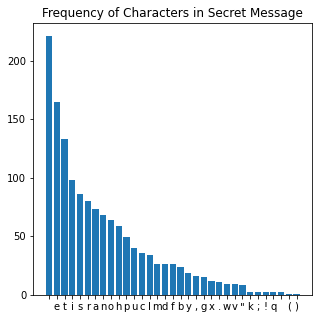

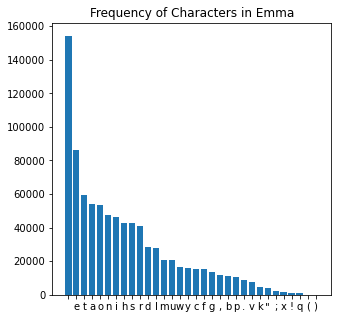

In [23]:
# Create a sorted dictionary based on the keys
deciphered_chars = defaultdict(int)
for m in deciphered:
    for c in m:
        deciphered_chars[c] += 1
deciphered_chars_orders = sorted(deciphered_chars.items(), key=lambda x: x[1], reverse=True)
deciphered_chars_ranks = [i[0] for i in deciphered_chars_orders]
# Plot the bar graph of the distribution of characters
plt.figure(figsize=(5,5))
plt.bar(range(len(deciphered_chars_orders)), [x[-1] for x in deciphered_chars_orders], align='center')
plt.xticks(range(len(deciphered_chars_orders)), [x[0] for x in deciphered_chars_orders]);
plt.title("Frequency of Characters in Secret Message")
plt.figure(figsize=(5,5))
plt.bar(range(len(sort_orders)), [x[-1] for x in sort_orders], align='center')
plt.xticks(range(len(sort_orders)), [x[0] for x in sort_orders]);
plt.title("Frequency of Characters in Emma");

When we compare the distribution of letters we do see som similarities byt a lot more near misses thatn anything.
This shows our approach was not entirely wrong, just that the message text was too small and had heavy waitings on some letters over others.

There is some flavour text on the main page for the challenges. Let's see if the cipher works for this as well.

In [24]:
flavour_text = ',unkdrvrul!ohqd;'
flavour_deciphered = ''
for mes in flavour_text:
        for letter in mes:
            flavour_deciphered = flavour_deciphered + cipher[letter]
print(flavour_deciphered)

thanks sherlock



A nice little message to end off the excercise